In [1]:
# Unzip the data set and rename it Netflix_shows_movies
import zipfile
import os

# Assuming the zipped file is named 'netflix_data.zip'
with zipfile.ZipFile('netflix_data.zip', 'r') as zip_ref:
    zip_ref.extractall('Netflix_shows_movies')
 
# Verify the extraction
print("Files extracted: ", os.listdir('Netflix_shows_movies'))
                     


Files extracted:  ['netflix_data.csv', '__MACOSX']


In [2]:
# Data Cleaning
import pandas as pd
 
# Load the dataset
file_path = 'Netflix_shows_movies/netflix_data.csv'  
# Update with the correct filename if different
df = pd.read_csv(file_path)
 
# Display initial information about the dataset
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description     

In [4]:
# Fill missing values or drop rows with missing values
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('No Country', inplace=True)
df.dropna(subset=['date_added', 'rating'], inplace=True)
 
# Verify missing values are addressed
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [5]:
#  Data Exploration
# Generate data descriptions
print(df.describe(include='all'))
 
# Statistical analysis
most_common_genre = df['listed_in'].value_counts().idxmax()
print(f'The most common genre is: {most_common_genre}')
 
average_duration = df[df['duration'].str.contains('min')]['duration'].str.extract('(\d+)').astype(int).mean()
print(f'The average duration of movies is: {average_duration[0]} minutes')

             show_id   type title     director     cast        country  \
count   6.214000e+03   6214  6214         6214     6214           6214   
unique           NaN      2  6153         3299     5456            555   
top              NaN  Movie  Love  No Director  No Cast  United States   
freq             NaN   4257     3         1955      567           2023   
mean    7.670547e+07    NaN   NaN          NaN      NaN            NaN   
std     1.095708e+07    NaN   NaN          NaN      NaN            NaN   
min     2.477470e+05    NaN   NaN          NaN      NaN            NaN   
25%     8.003642e+07    NaN   NaN          NaN      NaN            NaN   
50%     8.016396e+07    NaN   NaN          NaN      NaN            NaN   
75%     8.024503e+07    NaN   NaN          NaN      NaN            NaN   
max     8.123573e+07    NaN   NaN          NaN      NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              6214   6214.000000 

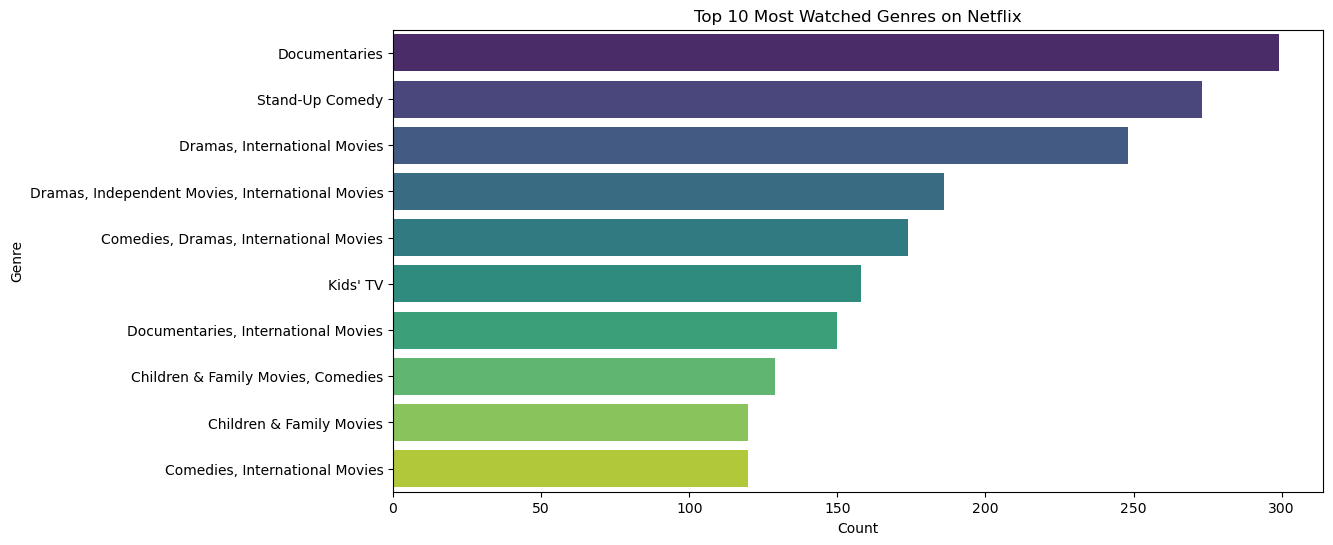

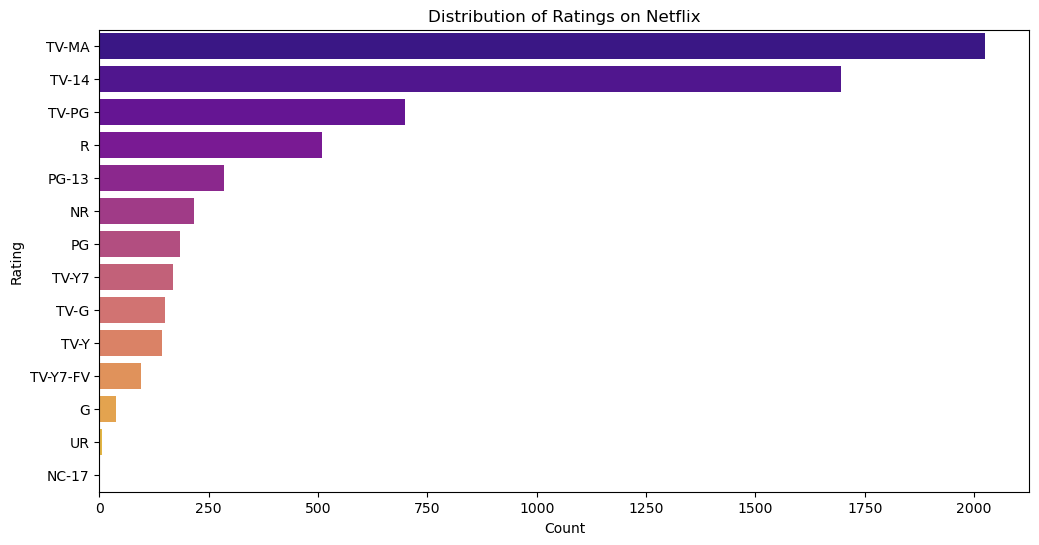

In [6]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
 
# Most watched genres
plt.figure(figsize=(12, 6))
genre_counts = df['listed_in'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
 
# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, palette='plasma', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

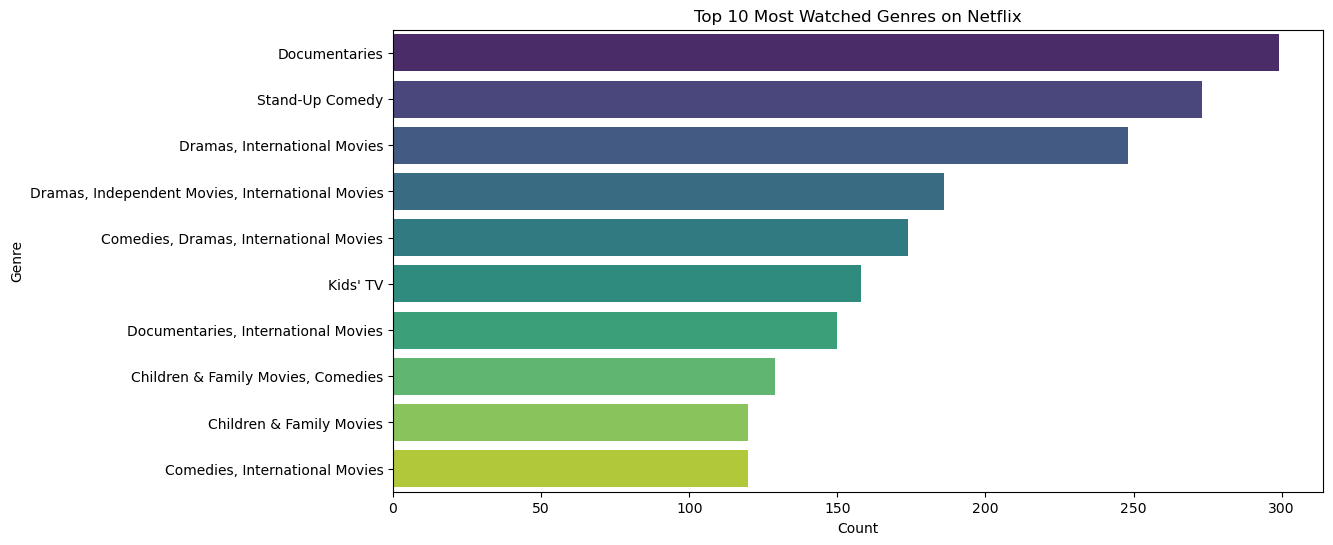

In [7]:
# Save one of the visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('top_genres.png')
plt.show()

In [ ]:
# Save the work as a zipped file
import shutil
 
# Create a folder to save the notebook and images
os.makedirs('Netflix_analysis', exist_ok=True)
 
# Assuming the notebook is saved as 'Netflix_analysis.ipynb'
shutil.copy('BAN6420Netflix.ipynb', 'Netflix_analysis/Netflix_analysis.ipynb')
shutil.copy('top_genres.png', 'Netflix_analysis/top_genres.png')
 
# Zip the folder
shutil.make_archive('Netflix_analysis', 'zip', 'Netflix_analysis')
